In [5]:
pip install pandas sas7bdat

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import zipfile
import os
import pandas as pd
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#cette partie sert à unzip le fichier autorisations : ce fichier trop gros ne peut pas etre chargé directement sur Github

zip_file_path = 'data/autorisations.zip'
extraction_dir = 'data'
os.makedirs(extraction_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

extracted_files = os.listdir(extraction_dir)
extracted_files


['autorisations.sas7bdat', 'autorisations.zip', 'autorisations_ext']

In [3]:
file_path = 'data/autorisations.sas7bdat'
with SAS7BDAT(file_path) as file:
    data = file.to_data_frame()
print(data)

            Carte Pays        Date     Heure   dateheure CodeRep   MCC  \
0             0.0  840  2003-12-02  17:47:52  2003-12-02      15  5812   
1             1.0  158  2003-11-25  06:00:20  2003-11-25      15  5311   
2             2.0  826  2003-11-12  14:10:57  2003-11-12      15  5211   
3             3.0  840  2003-11-07  03:41:55  2003-11-07      14  7399   
4             4.0  158  2003-11-23  05:07:03  2003-11-23      15  5311   
...           ...  ...         ...       ...         ...     ...   ...   
1151427  198041.0  056  2004-06-05  11:21:36  2004-06-05      00  5921   
1151428  198041.0  056  2004-06-19  16:59:40  2004-06-19      00  5921   
1151429  198042.0  056  2004-01-04  17:44:21  2004-01-04      00  5661   
1151430  198043.0  442  2004-02-03  19:38:47  2004-02-03      00  5541   
1151431  198043.0  442  2004-05-25  13:47:04  2004-05-25      00  5541   

         Montant  fraude  FM_Velocity_Condition_3  ...  FM_Sum_12  FM_Sum_24  \
0          69.25     0.0       

### ANALYSE EXPLORATOIRE

In [46]:
data.dtypes

Carte                       float64
Pays                         object
Date                         object
Heure                        object
CodeRep                      object
MCC                          object
Montant                     float64
fraude                      float64
FM_Velocity_Condition_3     float64
FM_Velocity_Condition_6     float64
FM_Velocity_Condition_12    float64
FM_Velocity_Condition_24    float64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3         float64
FM_Redondance_MCC_6         float64
FM_Redondance_MCC_12        float64
FM_Redondance_MCC_24        float64
FM_Difference_Pays_3        float64
FM_Difference_Pays_6        float64
FM_Difference_Pays_12       float64
FM_Difference_Pays_24       float64
dtype: object

• Le numero de carte

• La date de la transaction

• Le montant

• Le code du pays dans lequel la transaction a été réalisée

• Le code du commercant chez qui la transaction a été réalisée (MCC)

• Code réponse de la demande d’autorisation : 00 = Accepté, les autres codes sont des refus

• La variable fraude permet d’identifier les transactions frauduleuses

In [15]:
# columns = ["dateheure"] 
# data = data.drop(columns, axis=1)

In [11]:
#pas de nan
data.count().isna()

Carte                       False
Pays                        False
Date                        False
Heure                       False
dateheure                   False
CodeRep                     False
MCC                         False
Montant                     False
fraude                      False
FM_Velocity_Condition_3     False
FM_Velocity_Condition_6     False
FM_Velocity_Condition_12    False
FM_Velocity_Condition_24    False
FM_Sum_3                    False
FM_Sum_6                    False
FM_Sum_12                   False
FM_Sum_24                   False
FM_Redondance_MCC_3         False
FM_Redondance_MCC_6         False
FM_Redondance_MCC_12        False
FM_Redondance_MCC_24        False
FM_Difference_Pays_3        False
FM_Difference_Pays_6        False
FM_Difference_Pays_12       False
FM_Difference_Pays_24       False
dtype: bool

In [45]:
data["FM_Redondance_MCC_6"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])

In [47]:
data["FM_Redondance_MCC_3"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])

In [50]:
data_dtypes = data.dtypes.reset_index().rename(columns={'index':'Champ',0:'Type'})
data_dtypes

for i in data.columns:
    data_dtypes.loc[data_dtypes['Champ']==i,'Modalités'] = str(sorted(data[i].unique().tolist()))
    data_dtypes.loc[data_dtypes['Champ']==i,'NbDistinctVal'] = data[i].nunique()

In [51]:
data_dtypes

,Champ,Type,Modalités,NbDistinctVal
0,Carte,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",198044.0
1,Pays,object,"['008', '012', '020', '028', '031', '032', '03...",167.0
2,Date,object,"[datetime.date(2003, 11, 1), datetime.date(200...",243.0
3,Heure,object,"['00:00:00', '00:00:01', '00:00:02', '00:00:03...",85697.0
4,CodeRep,object,"['00', '02', '05', '07', '14', '15', '30', '41...",15.0
5,MCC,object,"['0000', '0001', '0004', '0100', '0596', '0741...",661.0
6,Montant,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",81202.0
7,fraude,float64,"[0.0, 1.0]",2.0
8,FM_Velocity_Condition_3,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",47.0
9,FM_Velocity_Condition_6,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",82.0


In [48]:
differences = data[data['FM_Redondance_MCC_3'] != data['FM_Redondance_MCC_6']]

print("Lignes où FM_Redondance_MCC_3 et FM_Redondance_MCC_6 sont différentes:")
print(differences)

Lignes où col3 et col4 sont différentes:
            Carte Pays        Date     Heure CodeRep   MCC  Montant  fraude  \
61           49.0  826  2003-11-24  11:36:46      15  5969     1.00     0.0   
62           49.0  826  2003-11-24  11:38:32      15  5969     1.00     0.0   
268         103.0  056  2004-03-20  06:48:13      00  4722   593.06     0.0   
271         103.0  484  2004-03-31  21:49:51      00  5970   227.39     0.0   
416         143.0  208  2004-06-01  20:23:37      00  4784    61.85     0.0   
...           ...  ...         ...       ...     ...   ...      ...     ...   
1151076  197980.0  756  2003-12-26  17:10:46      00  7011    52.64     0.0   
1151095  197988.0  826  2004-06-11  20:58:38      02  3642    92.50     0.0   
1151129  197998.0  020  2004-01-12  13:21:26      00  5541    24.10     0.0   
1151191  197999.0  504  2004-05-19  15:42:35      00  5411    33.48     0.0   
1151204  197999.0  818  2004-06-03  11:59:45      00  5309    33.81     0.0   

         F

In [63]:
data.columns = data.columns.str.lower()

pas de problème apparent dans les données : on peut commencer la premiere analyse exploratrice

In [70]:
data["fraude"] = data["fraude"].astype('int64')

In [71]:
print(f'Répartition variable "{"fraude"}":')
data[["fraude"]].value_counts(normalize=False)

Répartition variable "fraude":


fraude
0         1144186
1            7246
dtype: int64

In [77]:
# Calcul du pourcentage de fraude par pays
fraude_par_pays = data.groupby('pays')['fraude'].agg(['sum', 'count'])
fraude_par_pays['pourcentage_fraude'] = (fraude_par_pays['sum'] / fraude_par_pays['count']) 

# Renommer les colonnes pour plus de clarté
fraude_par_pays.rename(columns={'sum': 'nombre_de_fraudes', 'count': 'nombre_total'}, inplace=True)


FRAUDE PAR PAYS

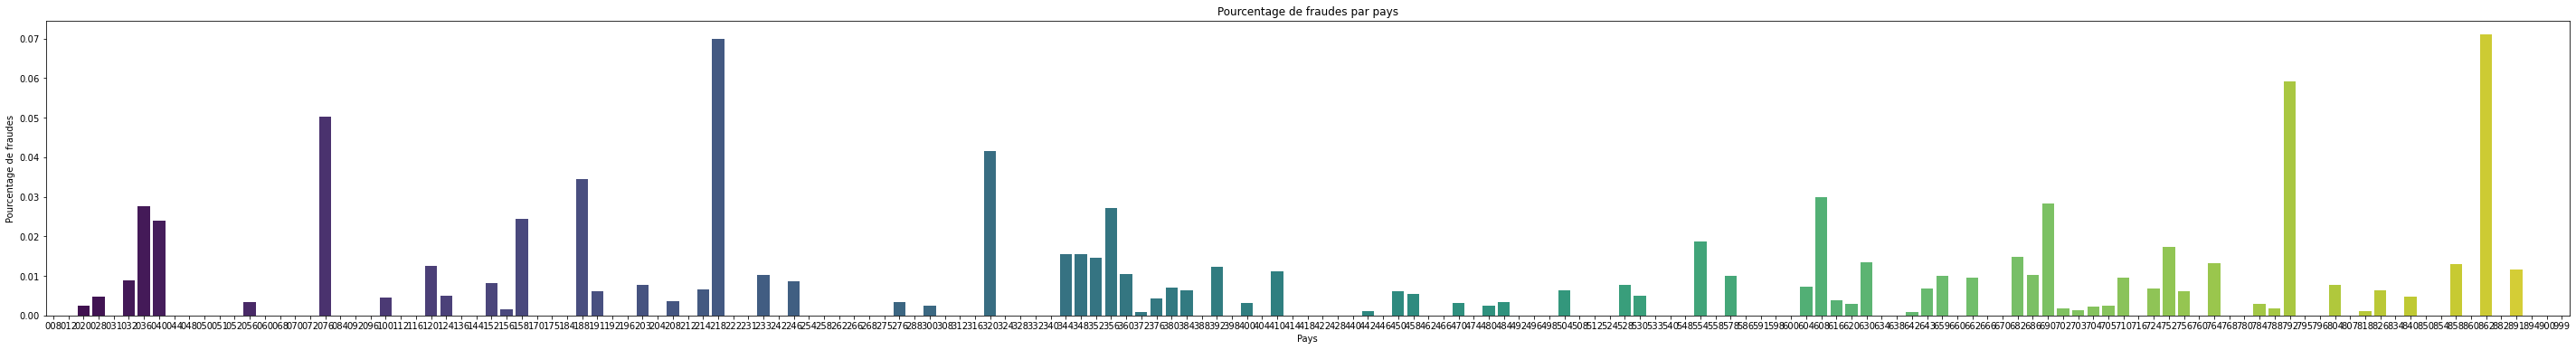

In [81]:
# Créer l'histogramme
plt.figure(figsize=(50, 6))
sns.barplot(x=fraude_par_pays.index, y=fraude_par_pays['pourcentage_fraude'], palette='viridis')

# Ajouter des labels et un titre
plt.xlabel('Pays')
plt.ylabel('Pourcentage de fraudes')
plt.title('Pourcentage de fraudes par pays')

# Afficher le graphique
plt.show()


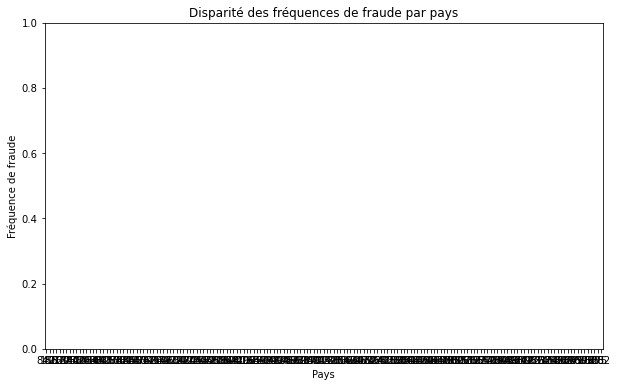

certains pays n'ont subi aucune fraude sur la période